---

### 📌 **Dataset Description**

* `hours_studied`: Number of hours a student studied per day (range: 0–10)
* `sleep_hours`: Number of hours of sleep per day (range: 4–9)
* `attendance`: Categorical value representing attendance level:

  * `minimum`, `low`, `avg`, `high`
* `pass`: Target label (`yes` or `no`) indicating if the student passed

Total entries: **150**

* 75 Pass (`yes`)
* 75 Fail (`no`)

---

### ✅ **Model**

* Task: **Student Performance Classification** using **Decision Tree**

* Preprocessing:

  * Converted `attendance` to numeric using `LabelEncoder`
    (`minimum=0`, `low=1`, `avg=2`, `high=3`)
  * Encoded target `pass` as:
    `no` → 0, `yes` → 1

* Features used:

  * `hours_studied`
  * `sleep_hours`
  * `attendance`

* Dataset split: **80-20 train-test split** using `train_test_split()`

* Model: Trained a **DecisionTreeClassifier** from `scikit-learn`

---

### 📊 **Evaluation**

* Metrics:

  * `accuracy_score`: Measures model correctness on test data
  * `classification_report`: Includes precision, recall, F1-score
* Visualizations:

  * ✅ Confusion Matrix using `seaborn.heatmap`
  * ✅ Decision Tree plot using `sklearn.tree.plot_tree`

---

### 💡 **Libraries Used**

```python
pandas
sklearn (tree, model_selection, preprocessing, metrics)
matplotlib.pyplot (for visualization)
seaborn (for confusion matrix heatmap)
```

In [ ]:
# Step 1: Upload CSV File in Google Colab
from google.colab import files
uploaded = files.upload()


Saving students_data.csv to students_data (1).csv


In [ ]:
# Step 2: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [ ]:
# Step 3: Load Dataset and Display First Few Rows
df = pd.read_csv("students_data.csv")
print("🔹 First 5 Rows of the Dataset:")
print(df.head())


🔹 First 5 Rows of the Dataset:
   hours_studied  sleep_hours attendance pass
0              2            6    minimum   no
1              8            9       high   no
2              2            7       high   no
3              9            6        avg   no
4              3            5       high   no


In [ ]:
# Step 4: Encode Categorical Features (attendance, pass)
le_attendance = LabelEncoder()
df['attendance'] = le_attendance.fit_transform(df['attendance'])  # minimum=0, low=1, avg=2, high=3

le_pass = LabelEncoder()
df['pass'] = le_pass.fit_transform(df['pass'])  # no=0, yes=1


In [ ]:
# Step 5: Define Features and Target Variable
X = df[['hours_studied', 'sleep_hours', 'attendance']]  # Features
y = df['pass']  # Target


In [ ]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)


In [ ]:
# Step 7: Train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

✅ Accuracy Score: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


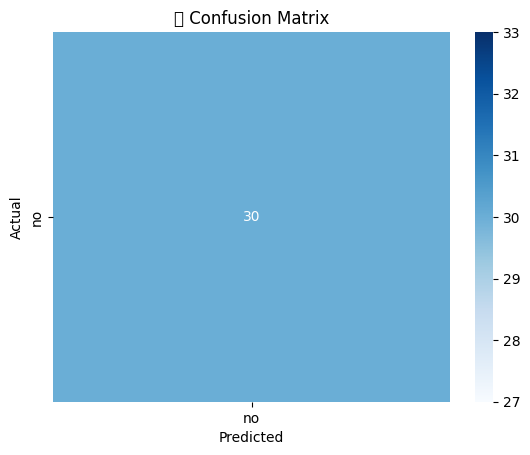

In [ ]:
# Step 8: Predict and Evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le_pass.classes_))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le_pass.classes_, yticklabels=le_pass.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🔍 Confusion Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


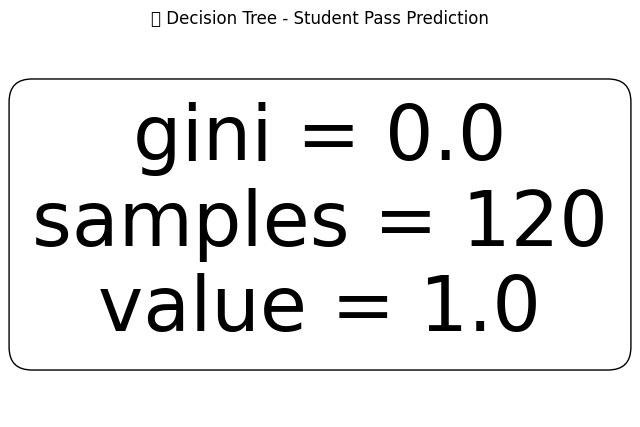

In [ ]:
# Step 9: Visualize the Decision Tree
plt.figure(figsize=(8, 5))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=le_pass.classes_,
    filled=True,
    rounded=True
)
plt.title("🎓 Decision Tree - Student Pass Prediction")
plt.show()
